In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
pd.set_option('display.max_columns', 500,'display.width',1000)
import warnings
warnings.filterwarnings('ignore')

In [240]:
#Loading Datasets
path_gender = 'Downloads/gender_submission.csv'
path_train = 'Downloads/train.csv'
path_test = 'Downloads/test.csv'

In [242]:
gender=pd.read_csv(path_gender)
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [244]:
train=pd.read_csv(path_train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
test=pd.read_csv(path_test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [248]:
gender.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [250]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [252]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [254]:
gender.shape

(418, 2)

In [256]:
train.shape

(891, 12)

In [258]:
test.shape

(418, 11)

In [260]:
gender.size

836

In [262]:
test.size

4598

In [264]:
train.size

10692

In [266]:
test.index

RangeIndex(start=0, stop=418, step=1)

In [268]:
gender.index

RangeIndex(start=0, stop=418, step=1)

In [270]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [272]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [274]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [276]:
gender.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [147]:
gender.describe(include='all')

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [149]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [151]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [153]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [155]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [161]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [163]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
gender=gender.drop_duplicates()
gender.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [167]:
test=test.drop_duplicates()
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [171]:
train=train.drop_duplicates()
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [173]:
males = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",males)

No of Males in Titanic: 577


In [177]:
female = len(train[train['Sex'] == 'female'])
print("No of Males in Titanic:",female)

No of Males in Titanic: 314


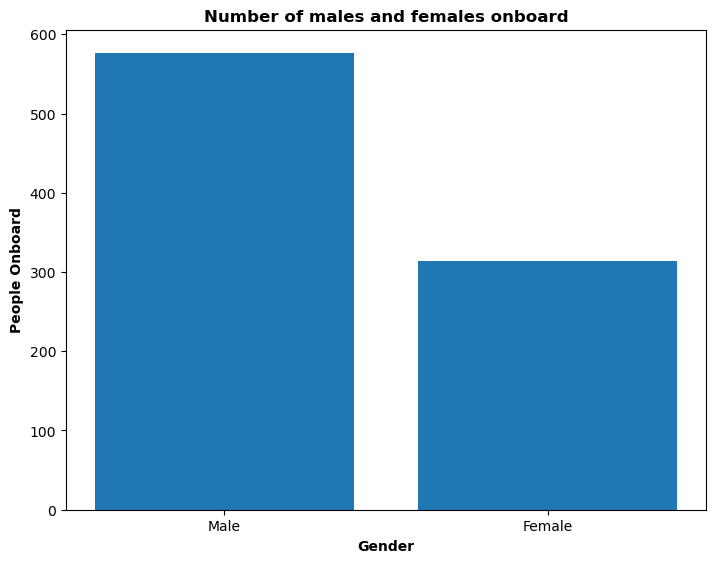

In [179]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.title("Number of males and females onboard",fontweight='bold')
plt.xlabel("Gender",fontweight='bold')
plt.ylabel("People Onboard",fontweight='bold')
plt.show()

In [191]:
train['Sex'] = pd.to_numeric(train['Sex'], errors='coerce')
train['Sex']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: Sex, Length: 891, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

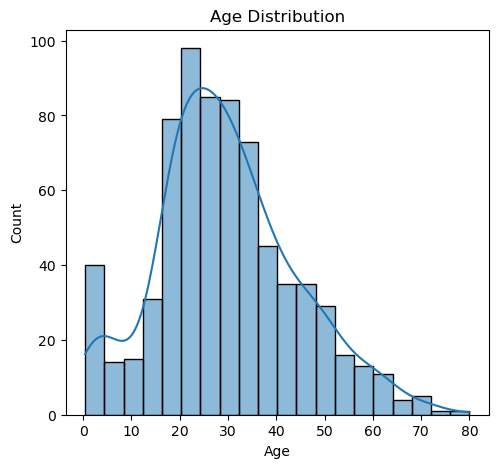

In [185]:
# Univariate Analysis:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train['Age'].dropna(), kde=True)
plt.title('Age Distribution')

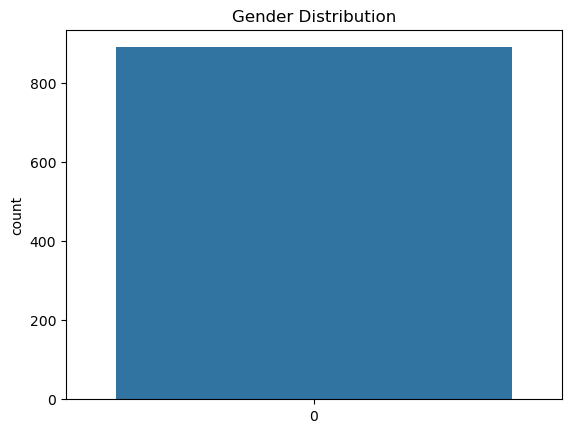

In [187]:
sns.countplot(train['Sex'])
gender = ['Male','Female']
count=[800]
ax.bar(gender,count)
plt.title('Gender Distribution')
plt.show()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

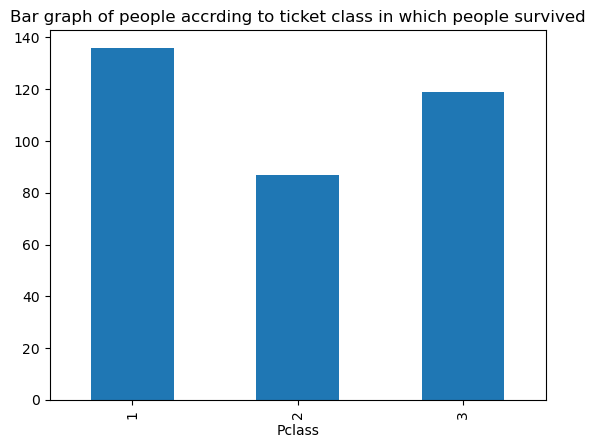

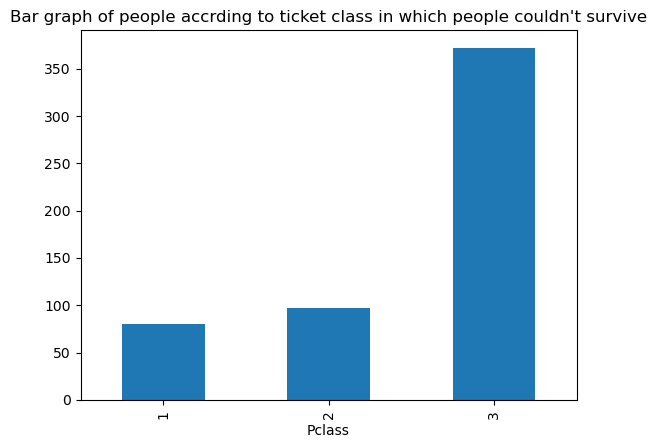

In [224]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

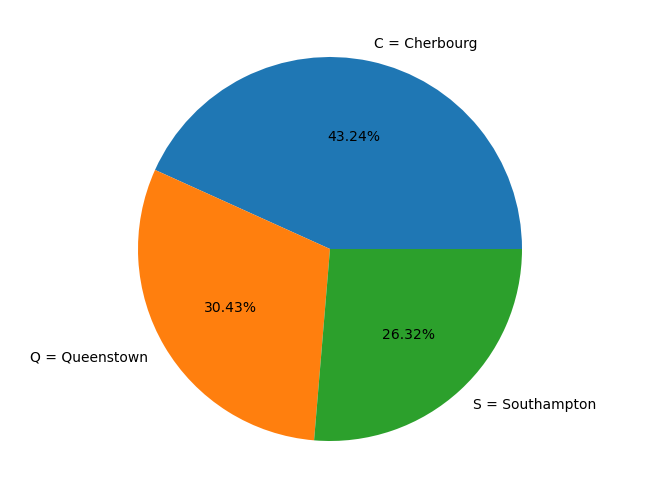

In [226]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

([<matplotlib.axis.XTick at 0x248489de2d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

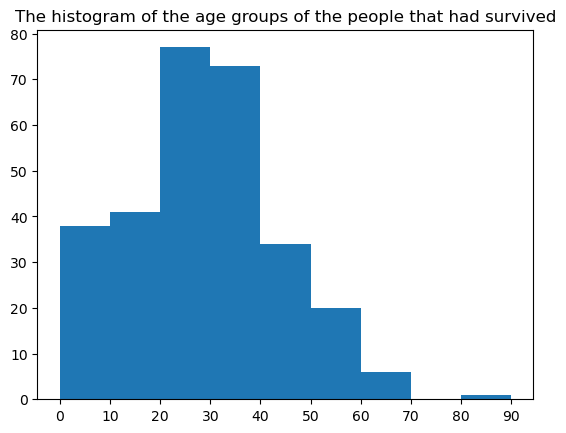

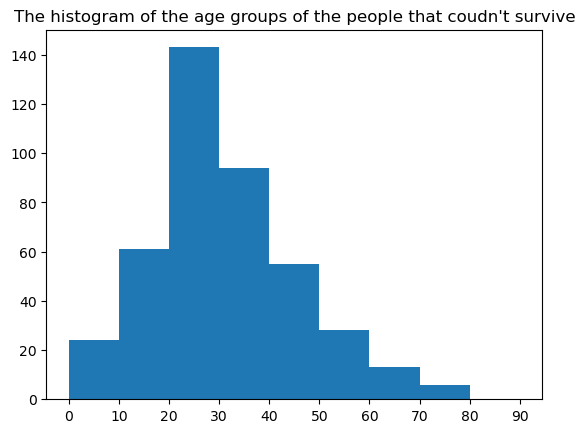

In [228]:
plt.figure(1)
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [230]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN


In [280]:
train['FamilySize'] = train['SibSp'] + train['Parch']

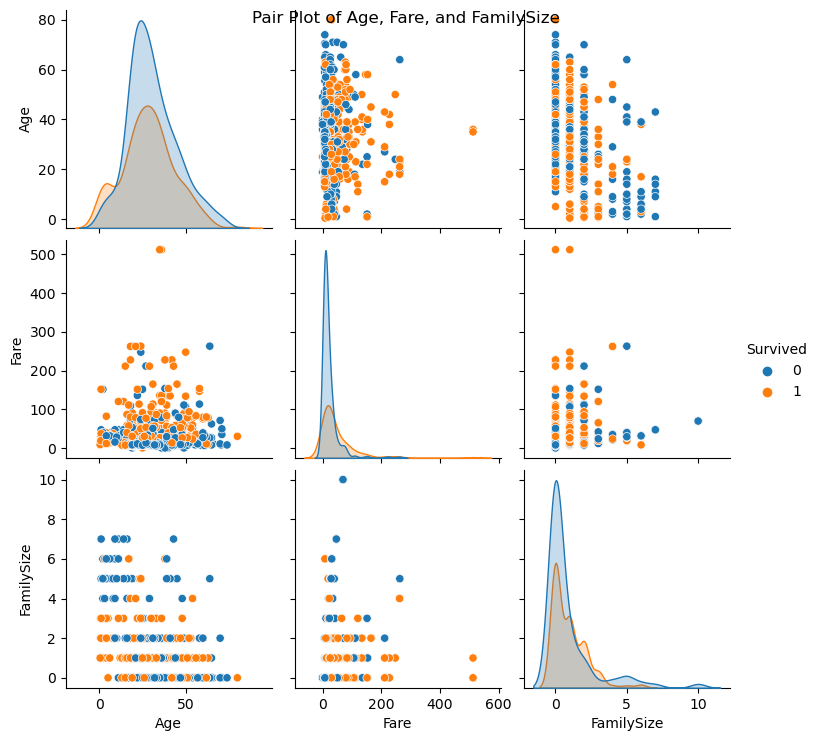

In [282]:
sns.pairplot(train, vars=['Age', 'Fare', 'FamilySize'], hue='Survived')
plt.suptitle('Pair Plot of Age, Fare, and FamilySize')
plt.show()

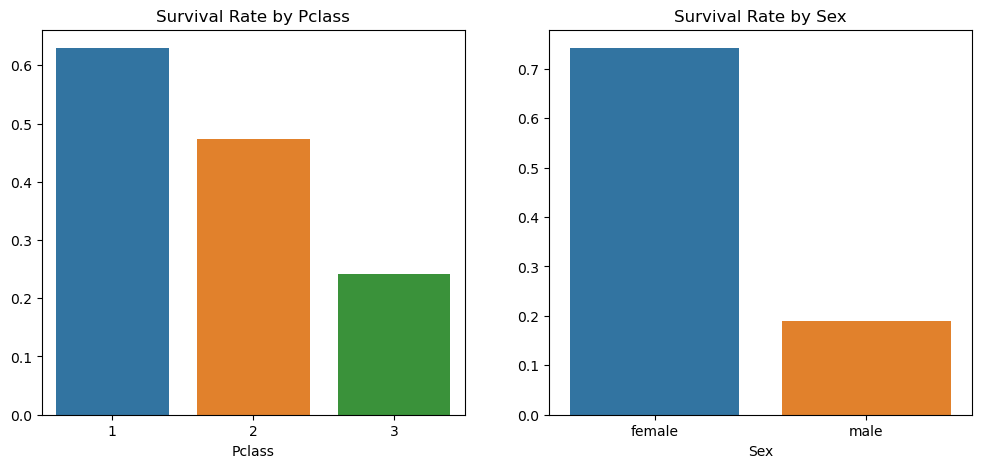

In [286]:
# Survival Analysis
survival_rate_by_class = train.groupby('Pclass')['Survived'].mean()
survival_rate_by_sex = train.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values)
plt.title('Survival Rate by Pclass')
plt.subplot(1, 2, 2)
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values)
plt.title('Survival Rate by Sex')
plt.show()

<Axes: >

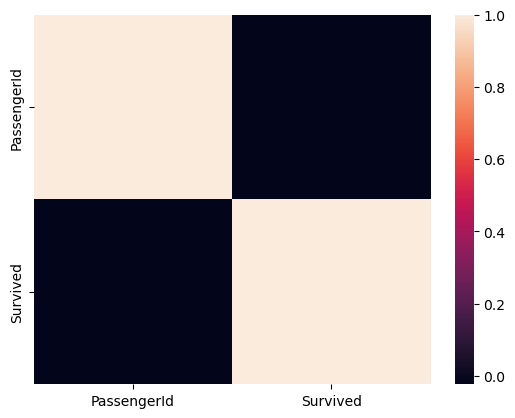

In [291]:
sns.heatmap(gender.corr())

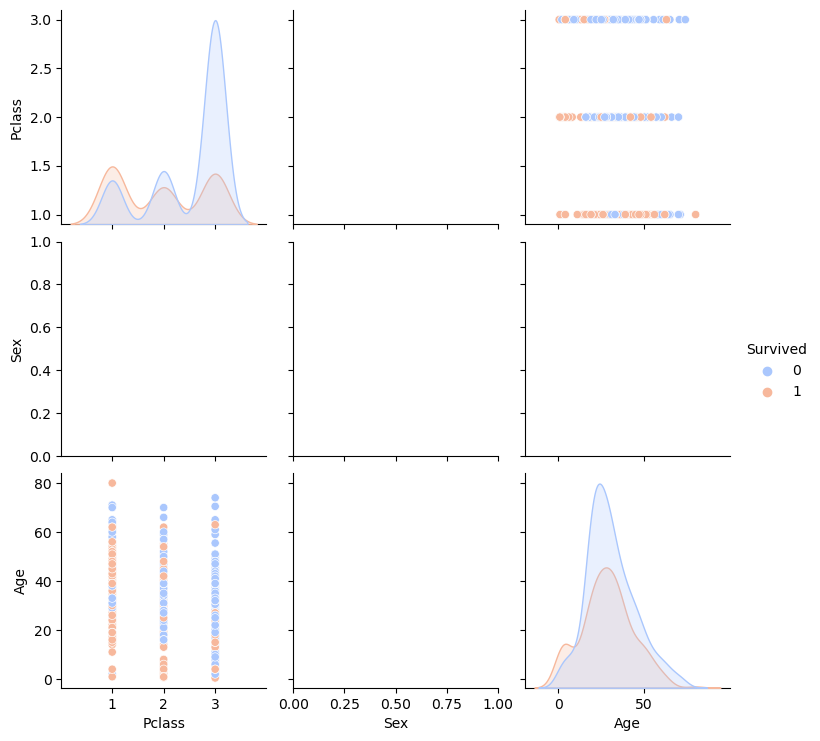

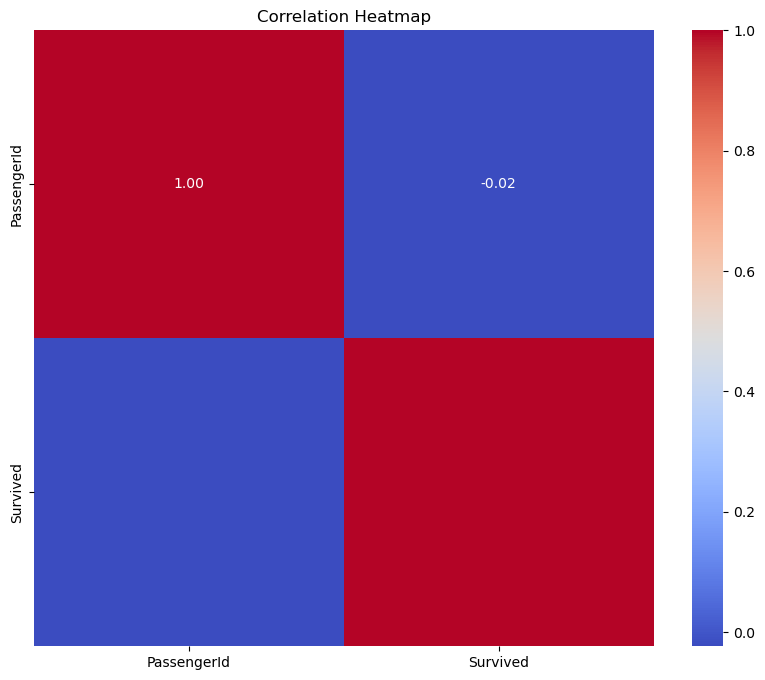

In [295]:
# Pairplot of selected features
selected_features = ['Survived', 'Pclass', 'Sex', 'Age']
# Convert categorical variables to numerical for the pairplot
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
sns.pairplot(train[selected_features], hue='Survived', palette='coolwarm')
plt.show()
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(gender.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

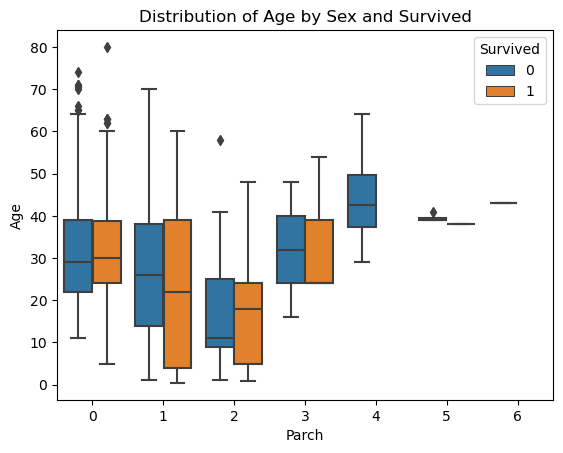

In [297]:
sns.boxplot(x='Parch', y='Age', hue='Survived', data=train)
plt.title('Distribution of Age by Sex and Survived')
plt.show()

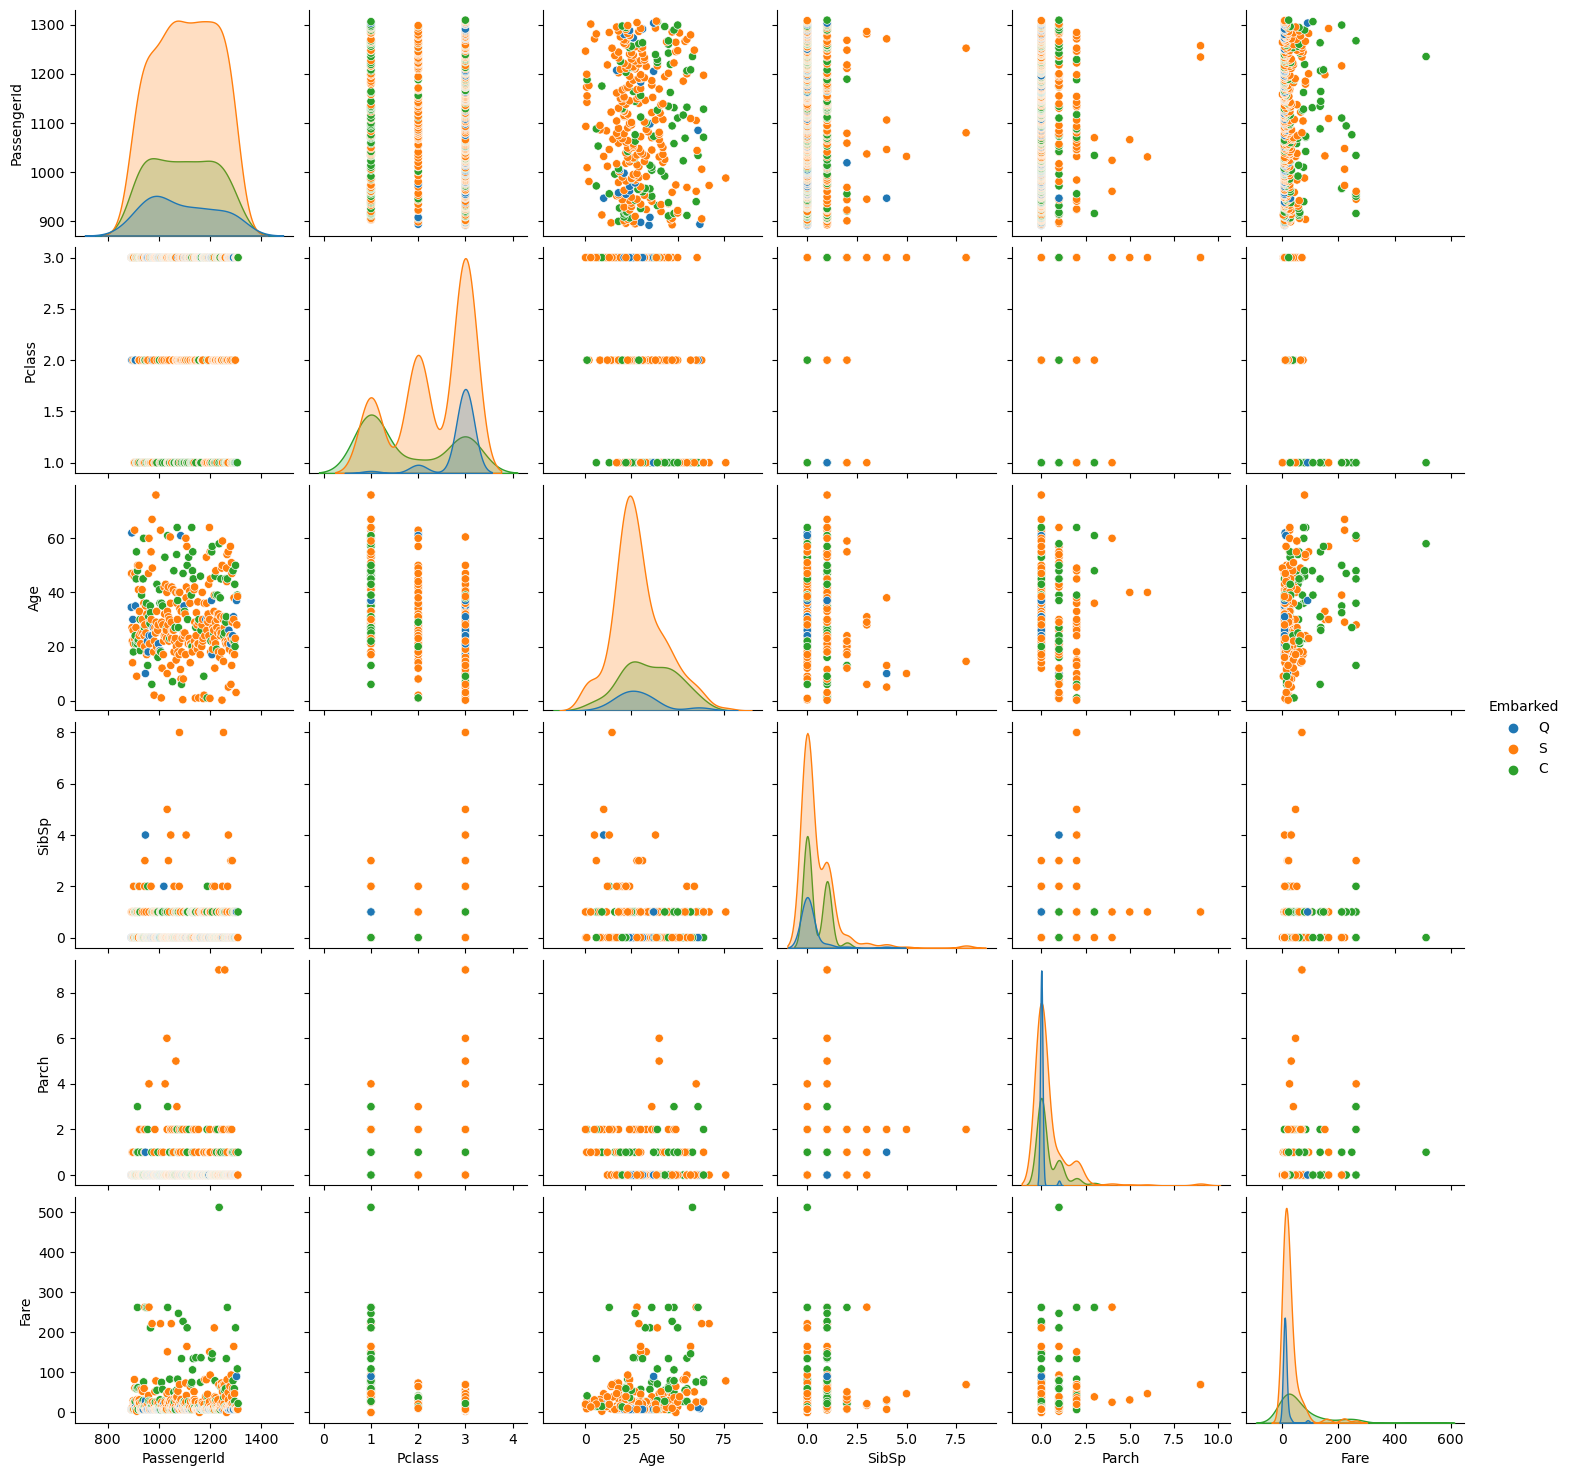

In [299]:
sns.pairplot(test,hue='Embarked')

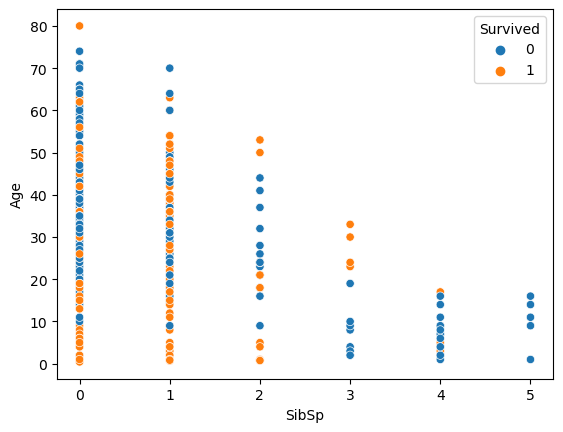

In [303]:
sns.scatterplot(x='SibSp', y='Age', hue='Survived',data=train)
plt.show()

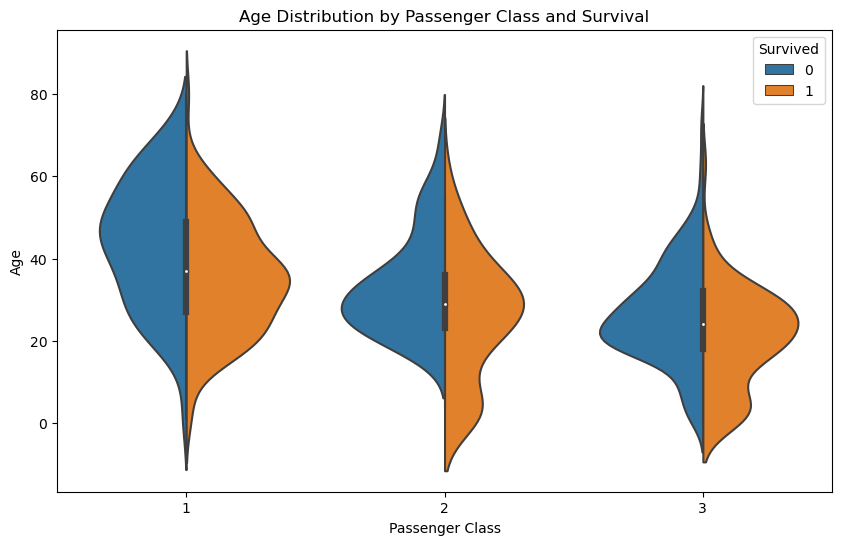

In [323]:
plt.figure(figsize=(10, 6))
sns.violinplot(data = train, x = 'Pclass', y = 'Age', hue = 'Survived', split=True)
plt.title('Age Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

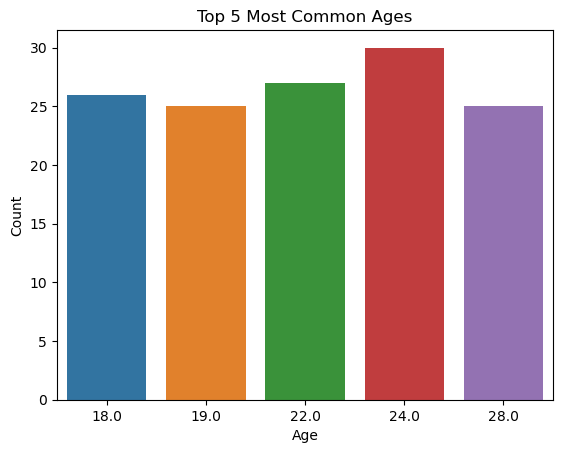

In [325]:
top_ages = train['Age'].value_counts().head(5)
# Create a bar plot using Seaborn
sns.barplot(x=top_ages.index, y=top_ages.values)
plt.title('Top 5 Most Common Ages')
plt.xlabel('Age')
plt.ylabel('Count')
# Display the plot
plt.show()